In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load all sheets from the Excel file

In [13]:
CD_df = pd.read_excel("Customer_Churn_Data_Large.xlsx", sheet_name='Customer_Demographics')
txn_df = pd.read_excel("Customer_Churn_Data_Large.xlsx", sheet_name='Transaction_History')
CS_df = pd.read_excel("Customer_Churn_Data_Large.xlsx", sheet_name='Customer_Service')
OA_df = pd.read_excel("Customer_Churn_Data_Large.xlsx", sheet_name='Online_Activity')
Churn_df = pd.read_excel("Customer_Churn_Data_Large.xlsx", sheet_name='Churn_Status')



In [14]:
Churn_df.head()

,CustomerID,ChurnStatus
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0


# Step 3: Merge datasets on 'CustomerID'

In [15]:
df=CD_df.merge(txn_df,on='CustomerID',how='left')\
.merge(CS_df,on='CustomerID',how='left')\
.merge(OA_df,on='CustomerID',how='left')\
.merge(Churn_df,on='CustomerID',how='left')

df.head()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,TransactionID,TransactionDate,AmountSpent,ProductCategory,InteractionID,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus
0,1,62,M,Single,Low,7194,2022-03-27,416.50,Electronics,6363.0,2022-03-31,Inquiry,Resolved,2023-10-21,34,Mobile App,0
1,2,65,M,Married,Low,7250,2022-08-08,54.96,Clothing,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
2,2,65,M,Married,Low,9660,2022-07-25,197.50,Electronics,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
3,2,65,M,Married,Low,2998,2022-01-25,101.31,Furniture,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
4,2,65,M,Married,Low,1228,2022-07-24,397.37,Clothing,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        6812 non-null   int64         
 1   Age               6812 non-null   int64         
 2   Gender            6812 non-null   object        
 3   MaritalStatus     6812 non-null   object        
 4   IncomeLevel       6812 non-null   object        
 5   TransactionID     6812 non-null   int64         
 6   TransactionDate   6812 non-null   datetime64[ns]
 7   AmountSpent       6812 non-null   float64       
 8   ProductCategory   6812 non-null   object        
 9   InteractionID     5204 non-null   float64       
 10  InteractionDate   5204 non-null   datetime64[ns]
 11  InteractionType   5204 non-null   object        
 12  ResolutionStatus  5204 non-null   object        
 13  LastLoginDate     6812 non-null   datetime64[ns]
 14  LoginFrequency    6812 n

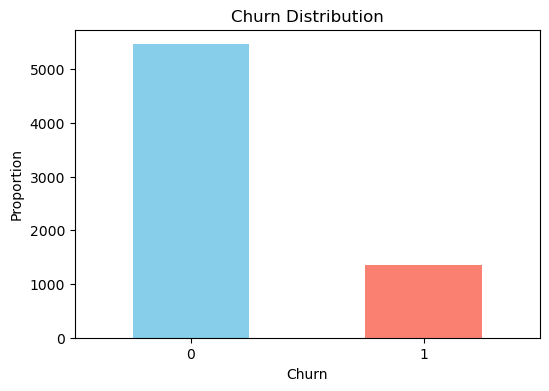

In [20]:
plt.figure(figsize=(6,4))
df['ChurnStatus'].value_counts().plot(kind='bar',color=['skyblue','salmon'])
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()

# Univariate & Bivariate Analysis so we can see how each feature relates to churn.

In [24]:
numeric_col = df.select_dtypes(include=['int64','float64']).columns
print(numeric_col)

Index(['CustomerID', 'Age', 'TransactionID', 'AmountSpent', 'InteractionID',
       'LoginFrequency', 'ChurnStatus'],
      dtype='object')


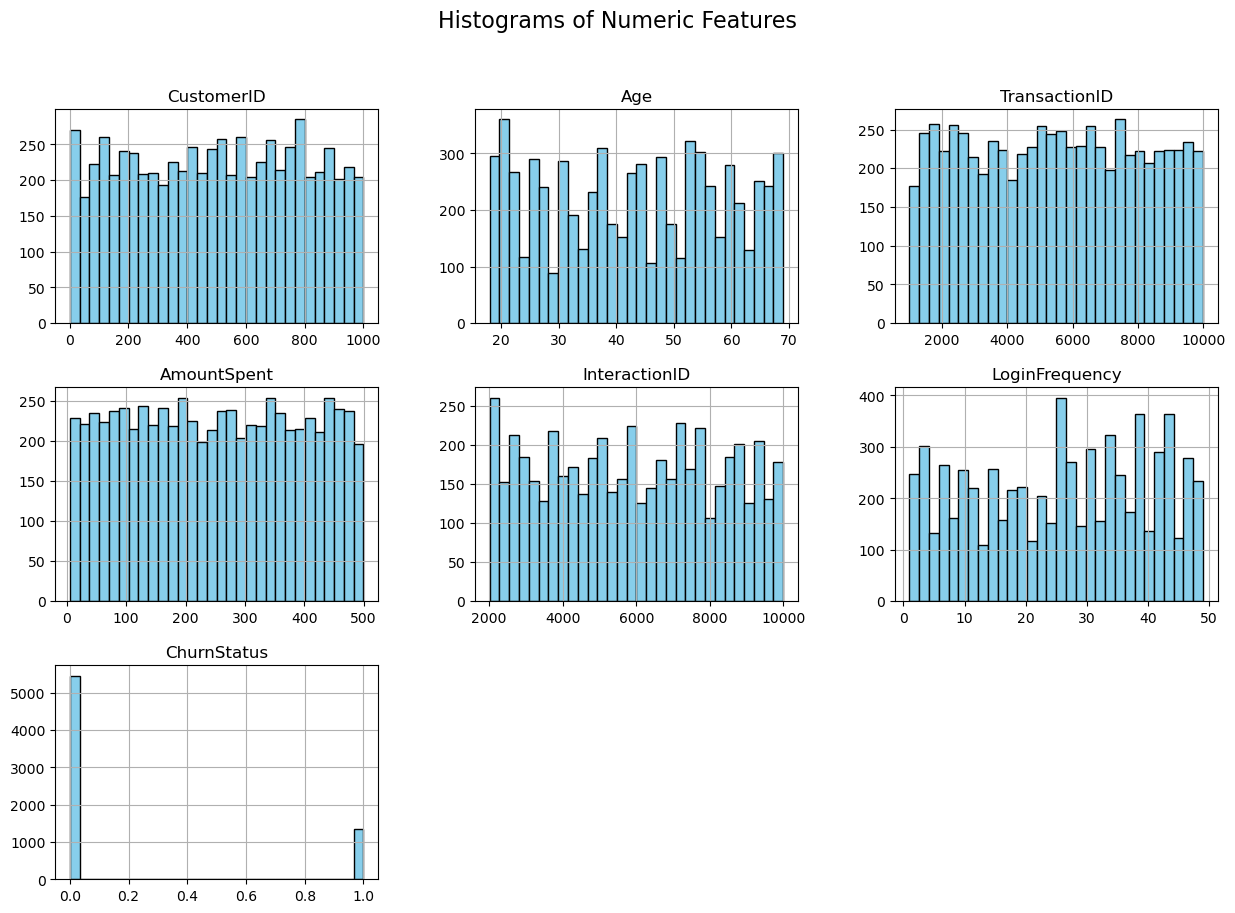

In [25]:
df[numeric_col].hist(bins=30,figsize=(15,10),color='skyblue',edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.show()

## ----- 2. Boxplots of numeric features vs Churn -----


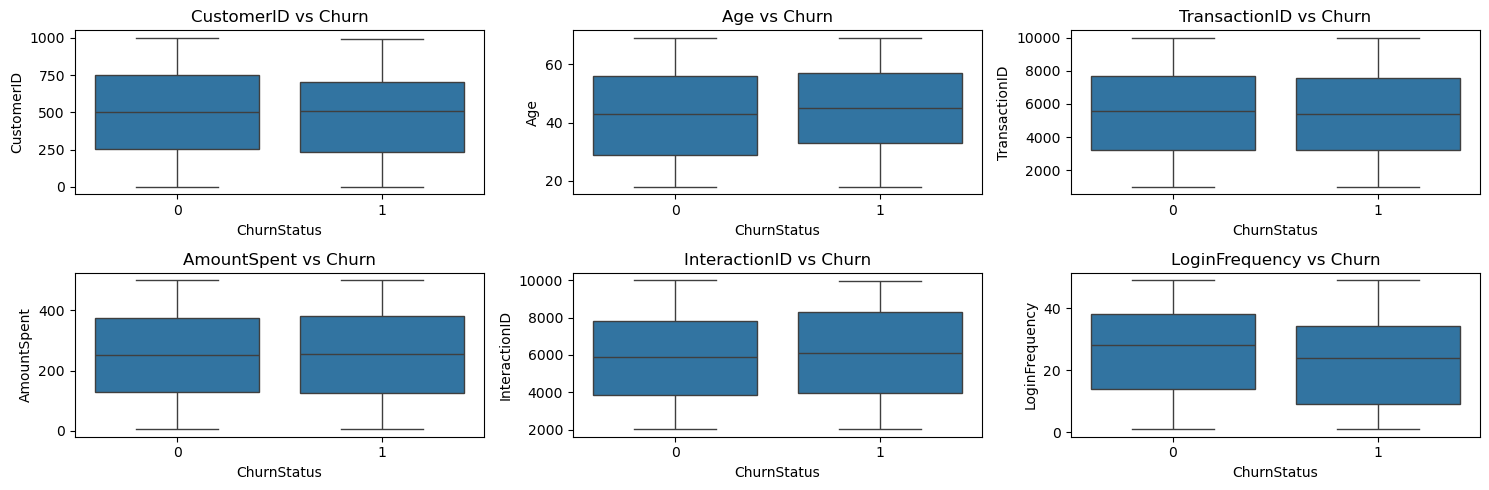

In [30]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_col[:6]):  # First 6 numeric columns
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df, x='ChurnStatus', y=col)
    plt.title(f"{col} vs Churn")
plt.tight_layout()
plt.show()

In [33]:

# ----- 3. Churn rate by categorical features -----
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['Gender', 'MaritalStatus', 'IncomeLevel', 'ProductCategory',
       'InteractionType', 'ResolutionStatus', 'ServiceUsage'],
      dtype='object')

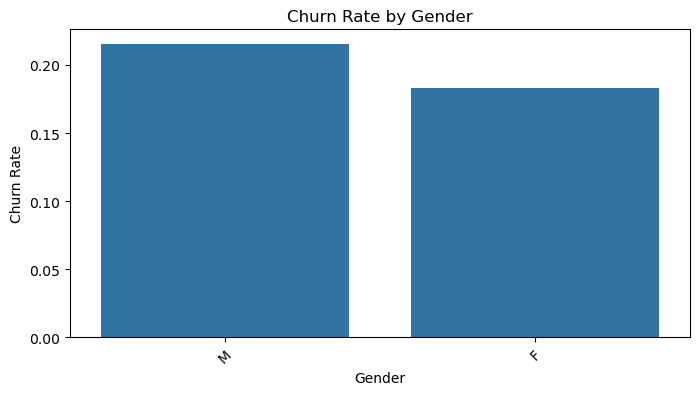

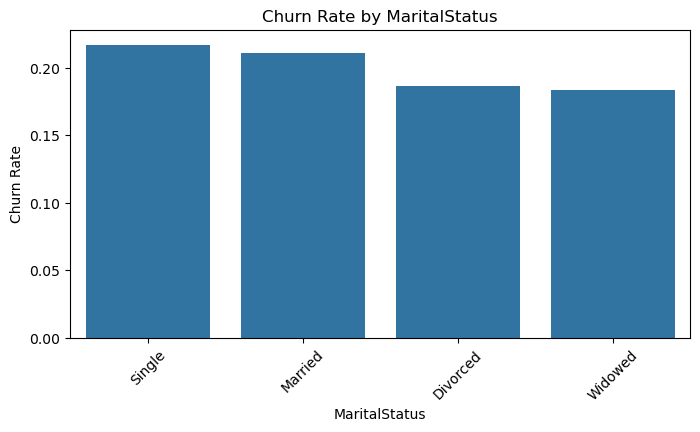

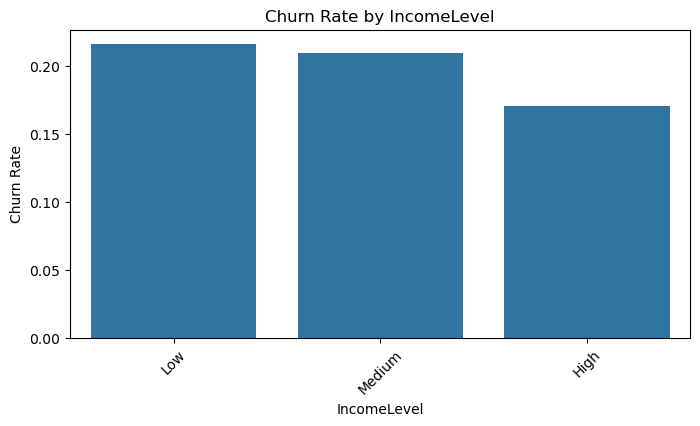

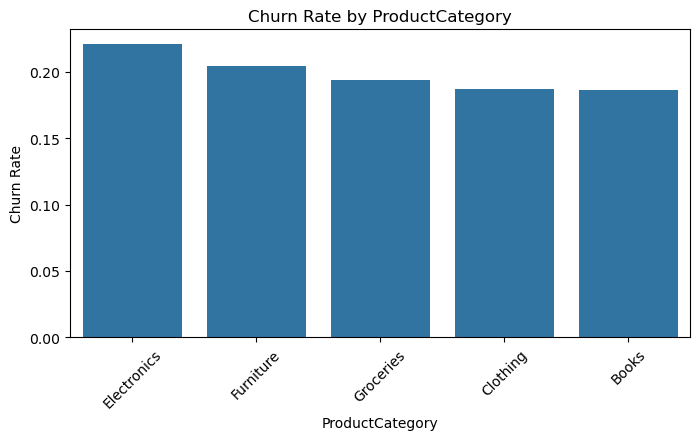

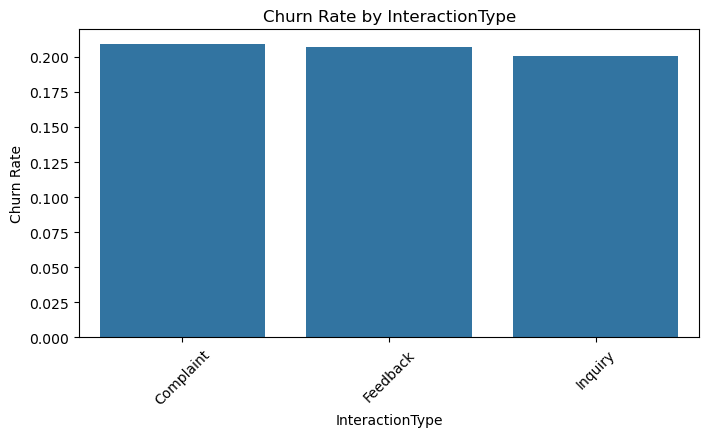

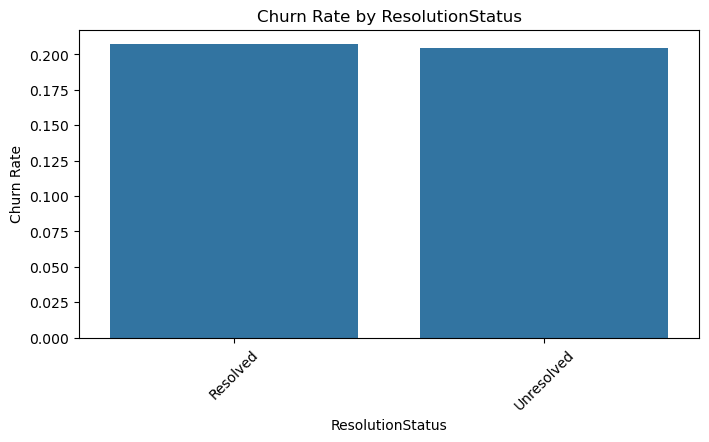

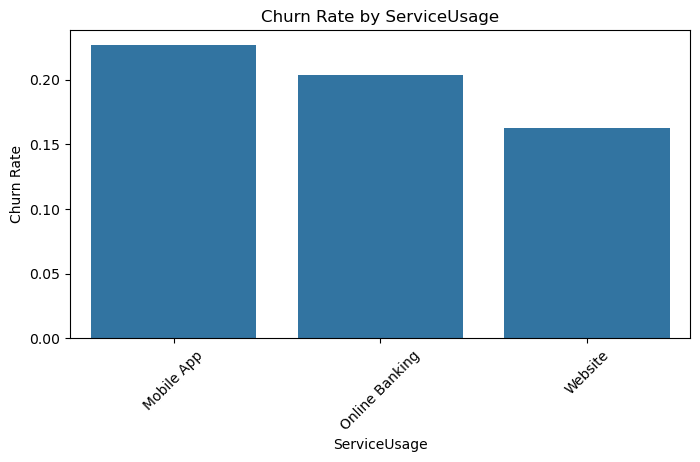

In [36]:
for col in categorical_cols:
    churn_rate = df.groupby(col)['ChurnStatus'].mean().sort_values(ascending=False)
    plt.figure(figsize=(8,4))
    sns.barplot(x=churn_rate.index, y=churn_rate.values)
    plt.title(f'Churn Rate by {col}')
    plt.ylabel('Churn Rate')
    plt.xticks(rotation=45)
    plt.show()


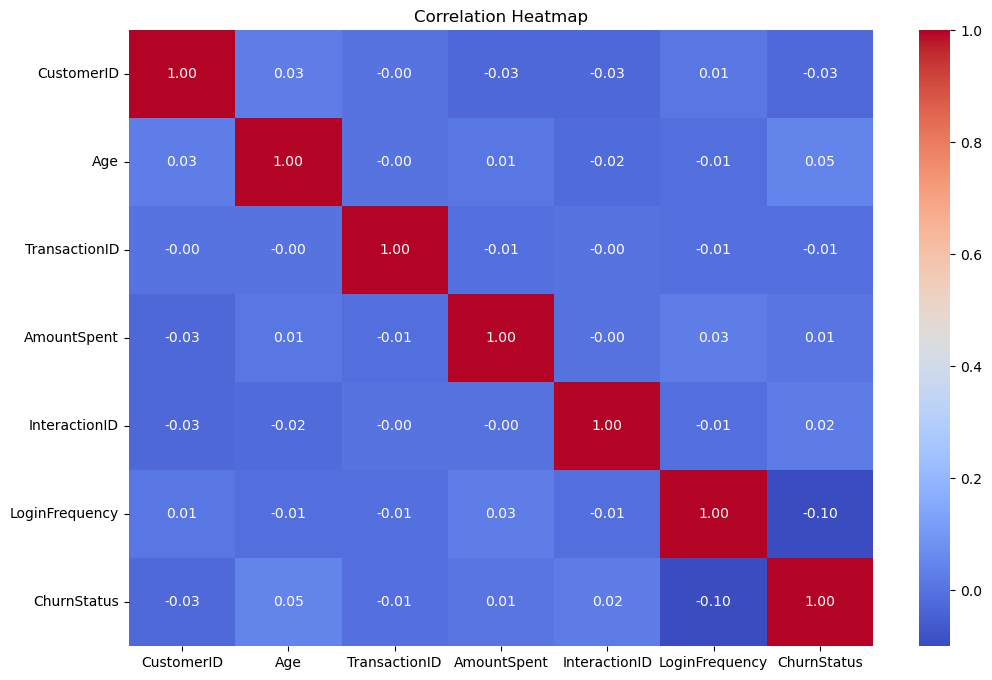

In [38]:
# ----- 4. Correlation heatmap -----
plt.figure(figsize=(12,8))
corr = df[numeric_col].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()